# Analiza sezonu mistrzowskiego Piasta Gliwice 

#### W sezonie 2018/19 Ekstraklasy dość niespodziewanym Mistrzem Polski został Piast Gliwice, w tym projekcie postarałem się przybliżyć kluczowe czynniki, które do tego doprowadziły.  Przy wykorzystaniu biblioteki BeautifulSoup, oraz napisanych w tym celu funkcji przetwarzałem zawarte na stronach internetowych statystyki tworząc znich ramki danych, które następnie analizowałem.
### Źródła: https://pl.wikipedia.org, https://www.transfermarkt.pl/, https://ekstrastats.pl/
            


In [1]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

# importing Dictionary.py containing dictionary to unify clubs names 
import Dictionary

# importing FunctionsCorrelation.py containing functions to get dataframes out of given urls for correlation frame
import FunctionsCorrelation

Funkcje przetwarzające statystyki ze stron internetowych:

In [2]:
## Deleting unnecessary tags
def tag_clean(soup):
    for tag in soup.find_all(['sup', 'tfoot']):
        tag.decompose()       

## Getting all tables from url as a list of dictionaries using BeautifulSoup library 
def get_tables_list(url, table_class):

    headers = {"User-Agent":"Mozilla/5.0"}
    r = requests.get(url, headers = headers)
    soup = bs(r.content)
    tag_clean(soup)
    tables = soup.find_all(class_ = table_class)
    all_tables = []
    
    for index, table in enumerate (tables): 
        rows = table.find_all('tr')
        current_table = []
        
        for index, row in enumerate(rows):
            if index == 0:
                keys = row.find_all('th')
            else:
                table_dictionary = {}
                cells = row.find_all('td')
                
                for index, cell in enumerate(cells):
                    content_value = cell.get_text(' ', strip=True)
                    try:
                        content_key = keys[index].get_text(' ', strip=True)
                    except:
                        content_key = 'index Exeption'
                    table_dictionary[content_key] = content_value
                    
                current_table.append(table_dictionary)
                
        all_tables.append(current_table)
        
    return all_tables

## Returning container of dictionaries for multiple urls using get_tables_list function
def multiple_url_tables(urls, table_class): 
    tables_container = []
        
    for url in urls:
        tables_from_url = get_tables_list(url, table_class)
        tables_container.append(tables_from_url)
        
    for index, tables in enumerate (tables_container):
        value = tables
        name = 'ekstraklasa' + str(2020-index)
        globals()[name] = value
    
    return tables_container


# Piast Gliwice na tle innych mistrzów Polski z ostatnich 10 lat 

Porównanie Piasta do mistrzów z ubiegłych 10 lat po 30 kolejkach rozgrywek, oraz podczas rundy finałowej dla mistrzów od sezonu 2013/14 (zmiana formuły na ESA37, więcej meczów w sezonie od sezonu 2013/14)




In [3]:
url2020 = 'https://pl.wikipedia.org/wiki/Ekstraklasa_w_pi%C5%82ce_no%C5%BCnej_(2019/2020)'
url2019 = 'https://pl.wikipedia.org/wiki/Ekstraklasa_w_pi%C5%82ce_no%C5%BCnej_(2018/2019)'
url2018 = 'https://pl.wikipedia.org/wiki/Ekstraklasa_w_pi%C5%82ce_no%C5%BCnej_(2017/2018)'
url2017 = 'https://pl.wikipedia.org/wiki/Ekstraklasa_w_pi%C5%82ce_no%C5%BCnej_(2016/2017)'
url2016 = 'https://pl.wikipedia.org/wiki/Ekstraklasa_w_pi%C5%82ce_no%C5%BCnej_(2015/2016)'
url2015 = 'https://pl.wikipedia.org/wiki/Ekstraklasa_w_pi%C5%82ce_no%C5%BCnej_(2014/2015)'
url2014 = 'https://pl.wikipedia.org/wiki/Ekstraklasa_w_pi%C5%82ce_no%C5%BCnej_(2013/2014)'
url2013 = 'https://pl.wikipedia.org/wiki/Ekstraklasa_w_pi%C5%82ce_no%C5%BCnej_(2012/2013)'
url2012 = 'https://pl.wikipedia.org/wiki/Ekstraklasa_w_pi%C5%82ce_no%C5%BCnej_(2011/2012)'
url2011 = 'https://pl.wikipedia.org/wiki/Ekstraklasa_w_pi%C5%82ce_no%C5%BCnej_(2010/2011)'
url2010 = 'https://pl.wikipedia.org/wiki/Ekstraklasa_w_pi%C5%82ce_no%C5%BCnej_(2009/2010)'
urls = [url2020, url2019, url2018, url2017, url2016, url2015, url2014, url2013, url2012, url2011, url2010]


In [5]:
tables_container = multiple_url_tables(urls, 'wikitable')

## Mistrzowie po 30 kolejkach

In [6]:
## Returning DataFrame object from tables_container elements that contains a '(M)'
def get_champions_after30(tables_container):
    champions = pd.DataFrame()
    for index, tables in enumerate (tables_container):
        if index < 7 :
            df = pd.DataFrame.from_dict(tables[2])        
        else:
            df = pd.DataFrame.from_dict(tables[1])

        df = df[df['Drużyna'].str.contains('(M)')]
        champions = champions.append(df, ignore_index=True)
        df = df.iloc[:,:]
    
    return champions
        

In [7]:
champions_after30 = get_champions_after30(tables_container)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [8]:
champions_after30

,Lp,Drużyna,M,Z,R,P,Bramki,Różn.,Pkt,Uwagi,Bezpośrednio,index Exeption,½
0,1,Legia Warszawa (M),30,19,3,8,63,30,+33,60,Wejście do grupy A,NaN,NaN
1,3,Piast Gliwice (M),30,15,8,7,47,31,+16,53,NaN,NaN,NaN
2,11,Miedź Legnica (S),30,8,8,14,30,52,−22,32,NaN,NaN,NaN
3,3,Legia Warszawa (M),30,17,3,10,43,31,+12,54,NaN,NaN,NaN
4,2,Legia Warszawa (M),30,17,7,6,58,30,+28,58,(29),NaN,NaN
5,1,Legia Warszawa (M),30,17,9,4,58,28,+30,60,Wejście do grupy A,(30),
6,2,Lech Poznań (M),30,14,12,4,52,27,+25,54,(27),NaN,NaN
7,1,Legia Warszawa (M),30,20,3,7,60,30,+30,63,Wejście do grupy A,(32),
8,1,Legia Warszawa (M),30,20,7,3,59,22,+37,67,Liga Mistrzów UEFA • II runda kwalifikacyjna,NaN,NaN
9,1,Śląsk Wrocław (M),30,17,5,8,47,31,+16,56,Liga Mistrzów UEFA • II runda kwalifikacyjna,NaN,NaN


In [9]:
## Cleaning up DataFrame
champions_edited = champions_after30.drop(columns = ['Bezpośrednio', 'index Exeption', '½','Pkt','Lp'])
champions_edited = champions_edited.rename(columns={'Uwagi':'Pkt', 'Różn.': 'Stracone', 'Bramki':'Strzelone'})
champions_edited = champions_edited.drop(index = 2)
champions_edited = champions_edited.reset_index().drop(columns = 'index')
champions_edited = champions_edited.reset_index()
champions_edited['Drużyna'] = champions_edited['Drużyna'].str.split('(').str[0] 
champions_edited ['Drużyna'] = champions_edited['Drużyna'] + (2020 - champions_edited['index']).astype(str)
champions_edited = champions_edited.drop(columns = 'index')
champions_edited['Pkt'] = champions_edited['Pkt'].astype(int)
champions_edited['Strzelone'] = champions_edited['Strzelone'].astype(int)
champions_edited['Stracone'] = champions_edited['Stracone'].astype(int)

### Tabela mistrzów z ostatnich 10 lat

In [10]:
champions30 = champions_edited.copy()
champions30

,Drużyna,M,Z,R,P,Strzelone,Stracone,Pkt
0,Legia Warszawa 2020,30,19,3,8,63,30,60
1,Piast Gliwice 2019,30,15,8,7,47,31,53
2,Legia Warszawa 2018,30,17,3,10,43,31,54
3,Legia Warszawa 2017,30,17,7,6,58,30,58
4,Legia Warszawa 2016,30,17,9,4,58,28,60
5,Lech Poznań 2015,30,14,12,4,52,27,54
6,Legia Warszawa 2014,30,20,3,7,60,30,63
7,Legia Warszawa 2013,30,20,7,3,59,22,67
8,Śląsk Wrocław 2012,30,17,5,8,47,31,56
9,Wisła Kraków 2011,30,17,5,8,44,29,56


### Punkty zdobyte po 30 kolejkach

In [11]:
champions30_points = champions30.sort_values('Pkt')
teams = champions30_points['Drużyna']
Points = champions30_points['Pkt']

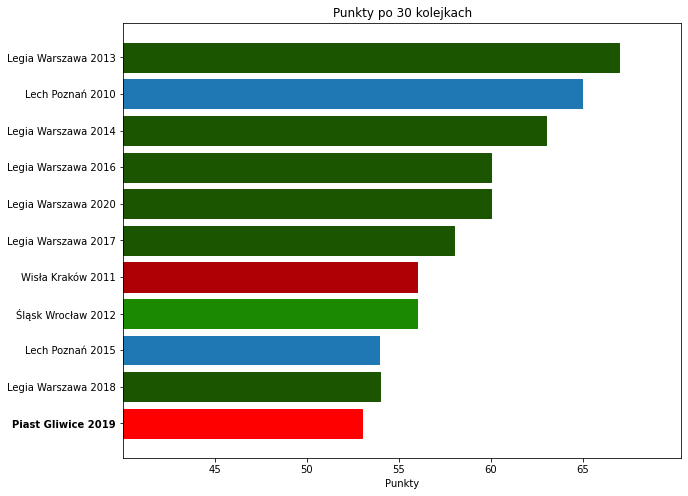

In [12]:
fig, points30 = plt.subplots(figsize=(10,8))

barh = points30.barh(teams, Points)
barh[0].set_color('r')
barh[1].set_color('#1b5500')
barh[5].set_color('#1b5500')
barh[6].set_color('#1b5500')
barh[7].set_color('#1b5500')
barh[4].set_color('#af0006')
barh[8].set_color('#1b5500')
barh[10].set_color('#1b5500')
barh[3].set_color('#1b8a00')
plt.xlabel('Punkty')
plt.xlim(xmin = 40)
plt.xticks((np.arange(45, 70, 5)))
points30.get_yticklabels()[0].set_weight('bold')
plt.title('Punkty po 30 kolejkach')
plt.show()


### Gole zdobyte po 30 kolejkach

In [13]:
champions30_scored = champions30.sort_values('Strzelone')
teams_scored = champions30_scored['Drużyna']
scored_goals = champions30_scored['Strzelone']

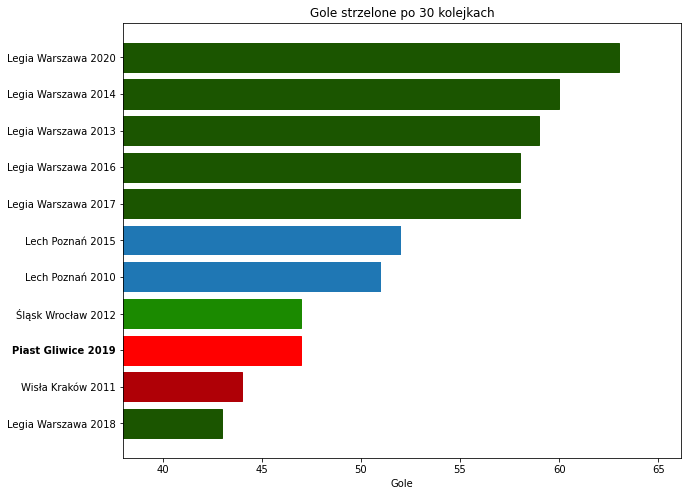

In [14]:
fig, scored30 = plt.subplots(figsize=(10,8))

barh = scored30.barh(teams_scored, scored_goals)
barh[2].set_color('r')
barh[0].set_color('#1b5500')
barh[9].set_color('#1b5500')
barh[6].set_color('#1b5500')
barh[7].set_color('#1b5500')
barh[1].set_color('#af0006')
barh[8].set_color('#1b5500')
barh[10].set_color('#1b5500')
barh[3].set_color('#1b8a00')
plt.xlabel('Gole')
plt.xlim(xmin = 38)
plt.title('Gole strzelone po 30 kolejkach')
plt.xticks((np.arange(40, 70, 5)))
scored30.get_yticklabels()[2].set_weight('bold')
plt.show()

### Gole stracone po 30 kolejkach

In [15]:
champions30_conceded = champions30.sort_values('Stracone', ascending=False)
teams_conceded = champions30_conceded['Drużyna']
conceded_goals = champions30_conceded['Stracone']

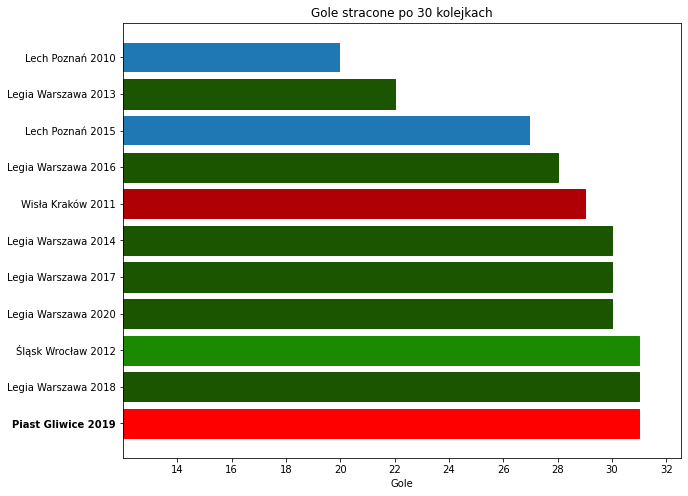

In [16]:
fig, conceded30 = plt.subplots(figsize=(10,8))

barh = conceded30.barh(teams_conceded, conceded_goals)
barh[0].set_color('r')
barh[4].set_color('#1b5500')
barh[5].set_color('#1b5500')
barh[1].set_color('#1b5500')
barh[7].set_color('#1b5500')
barh[6].set_color('#af0006')
barh[3].set_color('#1b5500')
barh[9].set_color('#1b5500')
barh[2].set_color('#1b8a00')
plt.xlabel('Gole')
plt.xlim(xmin = 12)
plt.title('Gole stracone po 30 kolejkach')
plt.xticks((np.arange(14, 34, 2)))
conceded30.get_yticklabels()[0].set_weight('bold')
plt.show()

### Obserwacje:
Zestawienie mistrzów Polski z ostatnich 10 lat po odbytych 30 kolejkach, potwierdzałoby tezę często stawianą przez media, że Piast to najsłabszy mistrz Polski od lat. Drużyna ta zdobyła najmniej punktów, tracąc najwięcej bramek (chociaż w tym aspekcie różnice nie są duże), w zestawieniu strzelonych bramek również była jedną z ostatnich drużyn. Należy jednak zauważyć, że od sezonu 2013/14 po wprowadzeniu reformy rozgrywek po 30 kolejkach przeprowadzana była dodatkowa 7-kolejkowa runda mistrzowska, w której grano z bezpośrednimi rywalami o mistrzostwo, stąd też poniżej analiza tej rundy w wykonaniu mistrzów.

## Mistrzowie w rundzie finałowej ESA37

In [17]:
## Returning champios after ESA37 (37 rounds)
def get_champions_esa37(tables_container):
    
    champions37 = pd.DataFrame()
    
    for index, tables in enumerate (tables_container):
        if index == 0 :
            df = pd.DataFrame.from_dict(tables[6]) 
            df = df.drop(index = [0,9])
        elif index < 7:
            df = pd.DataFrame.from_dict(tables[5]) 
            df = df.drop(index = [0,9]) 
        else:
            continue
       
        df = df[df['Drużyna'].str.contains('(M)')]
        champions37 = champions37.append(df, ignore_index=True)
        df = df.iloc[:,:] 
            
        
    return champions37

In [18]:
champions37_raw = get_champions_esa37(tables_container)
champions37_raw

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,Lp,Drużyna,M,Z,R,P,Bramki,Różn.,Pkt,Uwagi,Pkt RZ,index Exeption
0,1,Legia Warszawa (M),37,21,6,10,70,35,+35,69,Liga Mistrzów UEFA • I runda kwalifikacyjna,NaN
1,1,Piast Gliwice (M),37,21,9,7,57,33,+24,72,Liga Mistrzów UEFA • I runda kwalifikacyjna,NaN
2,15,Miedź Legnica (S),37,10,10,17,40,65,−25,40,Spadek do I ligi,NaN
3,1,Legia Warszawa (M),37,22,4,11,55,35,+20,70,Liga Mistrzów UEFA • I runda kwalifikacyjna,NaN
4,1,Legia Warszawa (M),37,21,10,6,70,31,+39,44,Liga Mistrzów UEFA • II runda kwalifikacyjna,NaN
5,1,Legia Warszawa (M),37,21,10,6,70,32,+38,43,NaN,Liga Mistrzów UEFA • II runda kwalifikacyjna
6,1,Lech Poznań (M),37,19,13,5,67,33,+34,43,Liga Mistrzów UEFA • II runda kwalifikacyjna,NaN
7,1,Legia Warszawa (M),37,26,3,8,75,34,+41,50,Liga Mistrzów UEFA • II runda kwalifikacyjna,NaN


In [19]:
# Cleaning up data
champion37_edit = champions37_raw.drop(index = 2)
champion37_edit = champion37_edit.reset_index()
champion37_edit = champion37_edit.drop(columns = ['index Exeption', 'index', 'Pkt RZ', 'Pkt'])
champion37_edit = champion37_edit.reset_index()
champion37_edit['Drużyna'] = champion37_edit['Drużyna'].str.split('(').str[0]
champion37_edit['Drużyna'] = champion37_edit['Drużyna'] + (2020 - champion37_edit['index']).astype(str)
champion37_edit = champion37_edit.drop(columns = 'index')
champions37 = champion37_edit.rename(columns = {'Bramki' : 'Strzelone37', 'Uwagi' : 'Pkt37', 'Różn.': 'Stracone37'})
champions37

,Lp,Drużyna,M,Z,R,P,Strzelone37,Stracone37,Pkt37
0,1,Legia Warszawa 2020,37,21,6,10,70,35,69
1,1,Piast Gliwice 2019,37,21,9,7,57,33,72
2,1,Legia Warszawa 2018,37,22,4,11,55,35,70
3,1,Legia Warszawa 2017,37,21,10,6,70,31,44
4,1,Legia Warszawa 2016,37,21,10,6,70,32,43
5,1,Lech Poznań 2015,37,19,13,5,67,33,43
6,1,Legia Warszawa 2014,37,26,3,8,75,34,50


In [20]:
# Merging 'chamions after 37 rounds to 'champions after 30 rounds'
champions_merged = champions30.merge(champions37, left_on='Drużyna', right_on='Drużyna')
champions_merged = champions_merged.drop(columns=['M_x', 'Z_x', 'R_x', 'P_x', 'M_y', 'Z_y', 'R_y', 'P_y'])
champions_merged

,Drużyna,Strzelone,Stracone,Pkt,Lp,Strzelone37,Stracone37,Pkt37
0,Legia Warszawa 2020,63,30,60,1,70,35,69
1,Piast Gliwice 2019,47,31,53,1,57,33,72
2,Legia Warszawa 2018,43,31,54,1,55,35,70
3,Legia Warszawa 2017,58,30,58,1,70,31,44
4,Legia Warszawa 2016,58,28,60,1,70,32,43
5,Lech Poznań 2015,52,27,54,1,67,33,43
6,Legia Warszawa 2014,60,30,63,1,75,34,50


In [21]:
champions_merged['Pkt_finalowa']= champions_merged['Pkt37'].astype(int) - champions_merged['Pkt'].astype(int)

In [22]:
##podzial punktow na pol przed runda finalowa do 2017 roku
champions_merged.iloc[3:,:]['Pkt_finalowa'] = champions_merged.loc[3:,:]['Pkt37'].astype(int) - champions_merged.loc[3:,:]['Pkt'].astype(int) // 2

<ipython-input-22-82cc61b3c1dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  champions_merged.iloc[3:,:]['Pkt_finalowa'] = champions_merged.loc[3:,:]['Pkt37'].astype(int) - champions_merged.loc[3:,:]['Pkt'].astype(int) // 2


In [23]:
champions_merged

,Drużyna,Strzelone,Stracone,Pkt,Lp,Strzelone37,Stracone37,Pkt37,Pkt_finalowa
0,Legia Warszawa 2020,63,30,60,1,70,35,69,9
1,Piast Gliwice 2019,47,31,53,1,57,33,72,19
2,Legia Warszawa 2018,43,31,54,1,55,35,70,16
3,Legia Warszawa 2017,58,30,58,1,70,31,44,15
4,Legia Warszawa 2016,58,28,60,1,70,32,43,13
5,Lech Poznań 2015,52,27,54,1,67,33,43,16
6,Legia Warszawa 2014,60,30,63,1,75,34,50,19


In [24]:
champions_merged['Strzelone_finalowa']= champions_merged['Strzelone37'].astype(int) - champions_merged['Strzelone'].astype(int)
champions_merged['Stracone_finalowa']= champions_merged['Stracone37'].astype(int) - champions_merged['Stracone'].astype(int)

### Tabela mistrzów uwzględniająca 30, 37 kolejek oraz samą rundę finałową

In [25]:
champions_final_round = champions_merged
champions_final_round

,Drużyna,Strzelone,Stracone,Pkt,Lp,Strzelone37,Stracone37,Pkt37,Pkt_finalowa,Strzelone_finalowa,Stracone_finalowa
0,Legia Warszawa 2020,63,30,60,1,70,35,69,9,7,5
1,Piast Gliwice 2019,47,31,53,1,57,33,72,19,10,2
2,Legia Warszawa 2018,43,31,54,1,55,35,70,16,12,4
3,Legia Warszawa 2017,58,30,58,1,70,31,44,15,12,1
4,Legia Warszawa 2016,58,28,60,1,70,32,43,13,12,4
5,Lech Poznań 2015,52,27,54,1,67,33,43,16,15,6
6,Legia Warszawa 2014,60,30,63,1,75,34,50,19,15,4


### Punkty zdobyte w rundzie finałowej

In [26]:
final_sorted_points = champions_final_round.sort_values('Pkt_finalowa')
final_points = final_sorted_points['Pkt_finalowa']
teams_points = final_sorted_points['Drużyna']

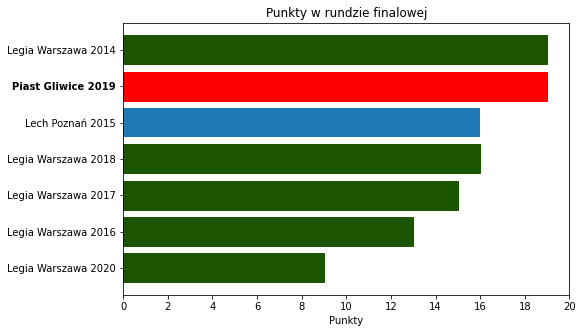

In [27]:
fig, points37_plt = plt.subplots(figsize=(8,5))

barh = points37_plt.barh(teams_points, final_points)
barh[5].set_color('r')
barh[0].set_color('#1b5500')
barh[6].set_color('#1b5500')
barh[1].set_color('#1b5500')
barh[2].set_color('#1b5500')
barh[3].set_color('#1b5500')
plt.xlabel('Punkty')
plt.title('Punkty w rundzie finalowej')
plt.xlim(xmin = 0)
plt.xticks((np.arange(0, 21, 2)))
points37_plt.get_yticklabels()[5].set_weight('bold')
plt.show()

### Gole strzelone w rundzie finałowej

In [28]:
final_sorted_scored = champions_final_round.sort_values('Strzelone_finalowa')
final_scored = final_sorted_scored['Strzelone_finalowa']
teams_scored = final_sorted_scored['Drużyna']

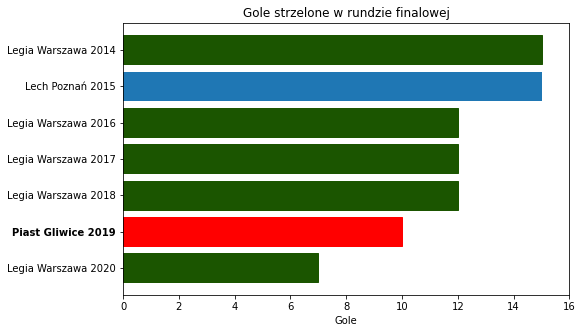

In [29]:
fig, scored37_plt = plt.subplots(figsize=(8,5))

barh = scored37_plt.barh(teams_scored, final_scored)
barh[1].set_color('r')
barh[0].set_color('#1b5500')
barh[6].set_color('#1b5500')
barh[4].set_color('#1b5500')
barh[2].set_color('#1b5500')
barh[3].set_color('#1b5500')
plt.xlabel('Gole')
plt.title('Gole strzelone w rundzie finalowej')
plt.xlim(xmin = 0)
plt.xticks((np.arange(0, 18, 2)))
scored37_plt.get_yticklabels()[1].set_weight('bold')
plt.show()

### Gole stracone w rundzie finałowej

In [30]:
final_sorted_conceded = champions_final_round.sort_values('Stracone_finalowa', ascending=False)
final_conceded = final_sorted_conceded['Stracone_finalowa']
teams_conceded = final_sorted_conceded['Drużyna']

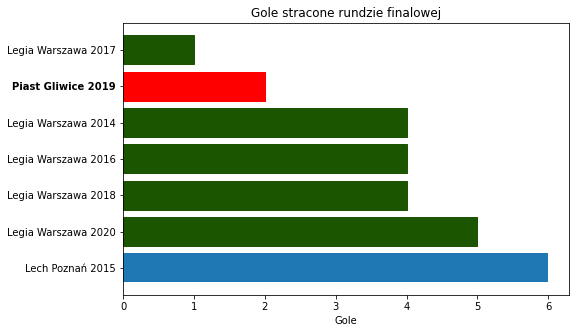

In [31]:
fig, conceded37_plt = plt.subplots(figsize=(8,5))

barh = conceded37_plt.barh(teams_conceded, final_conceded)
barh[5].set_color('r')
barh[1].set_color('#1b5500')
barh[6].set_color('#1b5500')
barh[4].set_color('#1b5500')
barh[2].set_color('#1b5500')
barh[3].set_color('#1b5500')
plt.xlabel('Gole')
plt.title('Gole stracone rundzie finalowej')
plt.xlim(xmin = 0)
plt.xticks((np.arange(0, 7, 1)))
conceded37_plt.get_yticklabels()[5].set_weight('bold')
plt.show()

### Obserwacje:
Wprowadznie rundy mistrzowskiej po sezonie zasadniczym miało na celu uatrakcyjnienie rozgrywek poprzez zwiększenie 'meczów o stawkę'. Mecze z bezpośrednimi rywalami pozwalają na odrobienie strat dlatego mistrzami zostawały drużyny które nie były liderem po sezonie zasadniczym (30 kolejek), tak jak było to w przypadku Piasta. Piast w rundzie mistrzowskiej zremisował jeden mecz wygrywając pozostałe, co jest najlepszym wynikiem (na równi z Legią z sezonu 2013/14), tracąc przy tym zaledwie dwie bramki. W aspekcie sezonu zasadniczego Piast wypada najgorzej spośród mistrzów, jednak w kluczowej fazie rundy finałowej był to zdecydowanie najlepszy występ od 5 lat, co na pewno miało wpływ na zdobycie tytułu.

## Co wpływa na pozycje w tabeli - analiza korelacji danych z ostatnich czterech lat
Na podstawie danych z ostatnich czterech lat opracowano macierze korelacji, szukając zależności między różnymi czynnikami a miejscem na koniec sezonu

In [32]:
# URLs

scores_first_url2017 = 'https://ekstrastats.pl/sezon-201617/'
scores_first_url2018 = 'https://ekstrastats.pl/sezon-2017-18/'
scores_first_url2019 = 'https://ekstrastats.pl/pierwszy-strzela-pierwszy-traci/'
scores_first_url2020 = 'https://ekstrastats.pl/pierwszy-strzela-pierwszy-traci-2/'

scores_first_urls = [scores_first_url2020, scores_first_url2019, scores_first_url2018, scores_first_url2017]

expgoals_url2017 = 'https://ekstrastats.pl/strzaly-expected-goals/'
expgoals_url2018 = 'https://ekstrastats.pl/strzaly-expected-goals-2/'
expgoals_url2019 = 'https://ekstrastats.pl/strzaly-expected-goals-3/'
expgoals_url2020 = 'https://ekstrastats.pl/strzaly-expected-goals-4/'

expgoals_urls = [expgoals_url2020, expgoals_url2019, expgoals_url2018, expgoals_url2017]

wikipedia_url2016 = 'https://pl.wikipedia.org/wiki/Ekstraklasa_w_pi%C5%82ce_no%C5%BCnej_(2015/2016)'
wikipedia_url2017 = 'https://pl.wikipedia.org/wiki/Ekstraklasa_w_pi%C5%82ce_no%C5%BCnej_(2016/2017)'
wikipedia_url2018 = 'https://pl.wikipedia.org/wiki/Ekstraklasa_w_pi%C5%82ce_no%C5%BCnej_(2017/2018)'
wikipedia_url2019 = 'https://pl.wikipedia.org/wiki/Ekstraklasa_w_pi%C5%82ce_no%C5%BCnej_(2018/2019)'
wikipedia_url2020 = 'https://pl.wikipedia.org/wiki/Ekstraklasa_w_pi%C5%82ce_no%C5%BCnej_(2019/2020)'

wikipedia_urls = [wikipedia_url2020, wikipedia_url2019, wikipedia_url2018, wikipedia_url2017]

cards_url2016 = 'https://ekstrastats.pl/sezon-201516/'
cards_url2017 = 'https://ekstrastats.pl/kartki-druzynowo/'
cards_url2018 = 'https://ekstrastats.pl/kartki-druzynowo-2/'
cards_url2019 = 'https://ekstrastats.pl/kartki-druzynowo-3/'
cards_url2020 = 'https://ekstrastats.pl/kartki-druzynowo-4/'

cards_urls = [cards_url2020, cards_url2019, cards_url2018, cards_url2017]

tm_url2020 = 'https://www.transfermarkt.pl/pko-ekstraklasa/startseite/wettbewerb/PL1/plus/?saison_id=2019'
tm_url2019 = 'https://www.transfermarkt.pl/pko-ekstraklasa/startseite/wettbewerb/PL1/plus/?saison_id=2018'
tm_url2018 = 'https://www.transfermarkt.pl/pko-ekstraklasa/startseite/wettbewerb/PL1/plus/?saison_id=2017'
tm_url2017 = 'https://www.transfermarkt.pl/pko-ekstraklasa/startseite/wettbewerb/PL1/plus/?saison_id=2016'
tm_url2016 = 'https://www.transfermarkt.pl/pko-ekstraklasa/startseite/wettbewerb/PL1/plus/?saison_id=2015'

tm_urls = [tm_url2020, tm_url2019, tm_url2018, tm_url2017]

stats_url2020 = 'https://ekstrastats.pl/tabele-ligowe-5/'
stats_url2019 = 'https://ekstrastats.pl/tabele-ligowe-4/'
stats_url2018 = 'https://ekstrastats.pl/tabele-ligowe-3/'
stats_url2017 = 'https://ekstrastats.pl/tabele-ligowe-2/'
stats_url2016 = 'https://ekstrastats.pl/tabele-ligowe/'

stats_urls = [stats_url2020, stats_url2019, stats_url2018, stats_url2017]

attendance_url2017 = 'https://ekstrastats.pl/frekwencja-na-stadionach'
attendance_url2018 = 'https://ekstrastats.pl/frekwencja-na-stadionach-2'
attendance_url2019 = 'https://ekstrastats.pl/frekwencja-na-stadionach-3'
attendance_url2020 = 'https://ekstrastats.pl/frekwencja-na-stadionach-4'

attendance_urls = [attendance_url2020, attendance_url2019, attendance_url2018, attendance_url2017]

clean_sheets_url2020 = 'https://ekstrastats.pl/statystyki-bramkarzy-4/'
clean_sheets_url2019 = 'https://ekstrastats.pl/statystyki-bramkarzy-3/'
clean_sheets_url2018 = 'https://ekstrastats.pl/statystyki-bramkarzy-2/'
clean_sheets_url2017 = 'https://ekstrastats.pl/statystyki-bramkarzy/'

clean_sheets_urls= [clean_sheets_url2020, clean_sheets_url2019, clean_sheets_url2018, clean_sheets_url2017]

In [33]:
# Creation of DataFrame collecting stats from last four years
def last_years(urls_stats, urls_tm, urls_cards, wikipedia_urls, expgoals_urls, attendance_urls, scores_first_urls, clean_sheets_urls):
    
    df_last_years = pd.DataFrame()

    standings_table = FunctionsCorrelation.get_standigs_table(urls_stats)
    tm_table = FunctionsCorrelation.get_tm_table(urls_tm)
    cards_table = FunctionsCorrelation.get_cards_table(urls_cards)
    trainers_table = FunctionsCorrelation.get_trainers_table(wikipedia_urls)
    exp_table = FunctionsCorrelation.get_exp_table(expgoals_urls)
    attandance_table = FunctionsCorrelation.get_attendance_table(attendance_urls)
    scores_first_table = FunctionsCorrelation.get_scores_first_table(scores_first_urls)
    clean_sheets_table = FunctionsCorrelation.get_clean_sheets_table(clean_sheets_urls)

    for i in range(4):
        standings_df = FunctionsCorrelation.get_standings_df(standings_table, i)
        tm_df = FunctionsCorrelation.get_tm_df(tm_table, i)
        cards_df = FunctionsCorrelation.get_df(cards_table, i)
        trainers_df = FunctionsCorrelation.get_trainers_df(trainers_table, i)
        exp_df = FunctionsCorrelation.get_exp_df(exp_table, i)
        attandance_df = FunctionsCorrelation.get_df(attandance_table, i)
        scores_first_df = FunctionsCorrelation.get_df(scores_first_table, i)
        clean_sheets_df = FunctionsCorrelation.get_clean_sheets_df(clean_sheets_table, i)

        df_i_year = standings_df
        df_list = [clean_sheets_df, tm_df, cards_df, trainers_df, exp_df, attandance_df, scores_first_df]

        for df in df_list:
            df_i_year = df_i_year.merge(df, left_on='klub', right_on='klub')
        
        df_last_years = df_last_years.append(df_i_year)
        
    return df_last_years

In [34]:
last_years_df = last_years(stats_urls, tm_urls, cards_urls, wikipedia_urls, expgoals_urls, attendance_urls, scores_first_urls, clean_sheets_urls)

In [35]:
## Last four years stats DataFrame
df_stats = last_years_df.dropna(axis='columns')
df_stats.head(5)

,klub,m,z_x,r_x,p_x,bz,bs,bilans,śr. pkt,śr. bz,...,G-xG,d-z,śrd-z,w-z,śrw-z,1. strzela,z_y,r_y,p_y,1. traci
0,Legia Warszawa,37,21,6,10,70,35,35,"1,86","1,89",...,-0.22,271320,14280,147509,8195,20,5,2,6,13
1,Lech Poznań,37,18,12,7,70,35,35,"1,78","1,89",...,22.09,222429,11707,138138,7674,21,0,8,5,13
2,Piast Gliwice,37,18,7,12,41,32,9,"1,65","1,11",...,-1.94,63191,3326,115579,6421,18,4,1,11,16
3,Lechia Gdańsk,37,15,11,11,48,50,-2,"1,51","1,30",...,7.07,153620,8534,123225,6486,17,3,3,11,17
4,Śląsk Wrocław,37,14,12,11,51,46,5,"1,46","1,38",...,5.41,197316,10422,144054,7430,16,4,4,10,18


In [36]:
## Preparing data to conversion to float type, displaying columns
df_stats = df_stats.replace({'€':'', 'mln': '', 'tys.':'',',':'.'}, regex=True)
df_stats.columns

Index(['klub', 'm', 'z_x', 'r_x', 'p_x', 'bz', 'bs', 'bilans', 'śr. pkt',
       'śr. bz', 'śr. bs', 'pozycja', 'czyste konta', 'lp', 'kadra', 'ø-wiek',
       'obcokrajowcy', 'łączna wartość rynkowa', 'ø-wartość rynkowa',
       'całkowita wr', 'ø-wr', 'żk/mecz', 'żk', 'czk bezp', 'czk', 'żk czas',
       'żk syml', 'żk ciesz', 'żk inne', 'czk inne', 'trener',
       'dni pracy trenera', 'dla xg', 'g dla', 'przeciw xg', 'g przeciw',
       'bilans xg', 'bilans g', 'G-xG', 'd-z', 'śrd-z', 'w-z', 'śrw-z',
       '1. strzela', 'z_y', 'r_y', 'p_y', '1. traci'],
      dtype='object')

## Statystyki bramkowe, a pozycja

In [37]:
## Geting correlation matrix 
goals1_cols = ['pozycja', 'bz', 'bs', 'bilans xg', 'G-xG']
goals2_cols = ['pozycja', '1. traci', '1. strzela', 'czyste konta']
correlation_goals1 = df_stats[goals1_cols].astype(float).corr('pearson')
correlation_goals2 = df_stats[goals2_cols].astype(float).corr('pearson')

<AxesSubplot:>

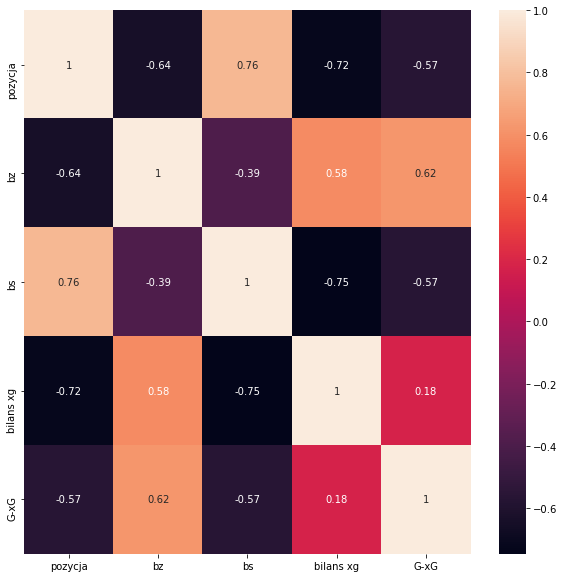

In [38]:
fig, corr_goals1 = plt.subplots(figsize=(10,10))

sn.heatmap(correlation_goals1, annot=True)

<AxesSubplot:>

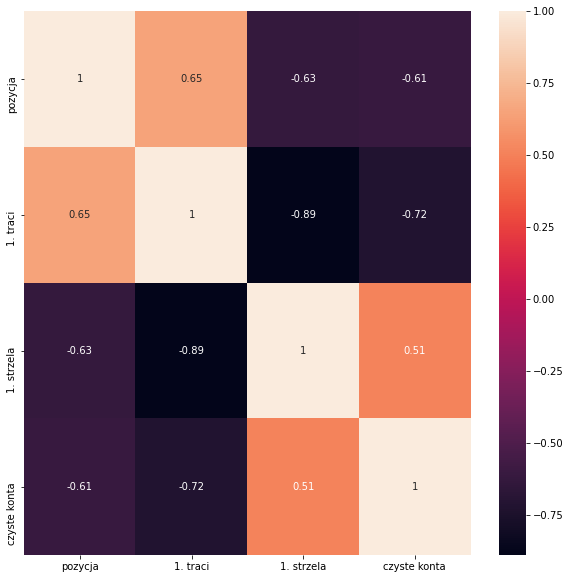

In [39]:
fig, corr_goals2 = plt.subplots(figsize=(10,10))

sn.heatmap(correlation_goals2, annot=True)

### Obserwacje:
1. Można zauważyć większą zależność między bramkami straconymi, a pozycją niżeli między bramkami zdobytymi, a pozycją.
2. Bilans z modelu expectedGoals (exG dla - exG przeciw) ma drugi najwyższy współczynnik korelacji liniowej do zajmowanej po sezonie pozycji. Model na podstawie sytuacji stworzonych w meczy i ich róznych przeliczników zwraca swoje przewidywania co do bramek. Dodatni bilans xG oznacza, że drużyna stwarza więcej okazji niż przeciwnik, z korelacji wynika, że im wyższy bilans na przestrzeni sezonu tym wyższe miejsce w tabeli.
3. Różnica między bilansem bramek a bilansem xG miała na celu sprawdzić która drużyna gra 'ponad stan'. Dodatnia wartość tej różnicy oznacza, że drużyna strzeliła więcej bramek niż przewidział to model expectedGoals na podstawie statystyk meczowych. Drużyny z wyższym współczynnikiem, są statystycznie skuteczniejsze i zajmują wyższe miejsca w tabeli
4. Drużyny tracące bramke jako pierwsze są niżej w tabeli, co może świadczyć, że strzelenie pierwszej bramki często rozstrzyga mecze.

<AxesSubplot:>

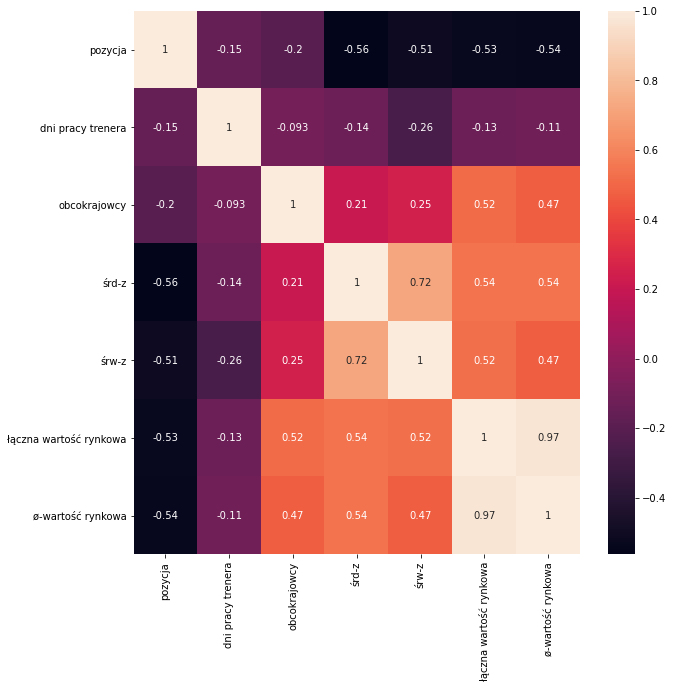

In [40]:
non_sport_cols = ['pozycja', 'dni pracy trenera', 'obcokrajowcy', 'śrd-z', 'śrw-z', 'łączna wartość rynkowa', 'ø-wartość rynkowa']
correlation_non_sport = df_stats[non_sport_cols].astype(float).corr()
fig, corr_non = plt.subplots(figsize=(10,10))

sn.heatmap(correlation_non_sport, annot=True)

### Obserwacje:
1. Zauważalna zależność między wartością drużyny a pozycja im droższa drużyna tym wyższe miejsce w tabeli. Wyższa wartość rynkowa oznacza przeważnie lepszych zawodników co tłumaczy tą zależność.
2. Średnia frekwencja a miejsce w tabeli: jednak to raczej liczba widowni jest zależna od miejsca niż na odwrót. Im lepsza gra drużyny tym więcej ludzi przychodzi na stadion
3. Praktyczny brak związku między dlugościa pracy trenera w klubie a pozycją w tabeli, co spowodowane może być dużą rotacją na stanowiskach w ekstraklasie gdzie czas pracy wiekszości trenerów jest podobny

# Zdobywane punkty

In [41]:
results2019url = 'https://pl.wikipedia.org/wiki/Ekstraklasa_w_pi%C5%82ce_no%C5%BCnej_(2018/2019)/Wyniki_spotka%C5%84_fazy_zasadniczej'
standings_url = 'https://pl.wikipedia.org/wiki/Ekstraklasa_w_pi%C5%82ce_no%C5%BCnej_(2018/2019)'
results_final2019 = 'https://pl.wikipedia.org/wiki/Ekstraklasa_w_pi%C5%82ce_no%C5%BCnej_(2018/2019)/Wyniki_spotka%C5%84_fazy_fina%C5%82owej'

Tabele wyników na podstawie których opracowano analize zdobywanych punktów:

In [42]:
# DataFrame of all results made out of wikipedia's table
results_2019 = get_tables_list(results2019url, 'wikitable')[0]
pd.DataFrame(results_2019)

,,ARK,CRA,GZA,JAG,KOR,LPO,LGD,LEG,MIE,PIA,POG,ŚLĄ,WKR,WPŁ,ZLU,ZSO
0,Arka Gdynia,–,0:3,1:1,0:2,1:2,1:0,0:0,1:2,1:1,1:2,2:3,0:2,4:1,3:3,3:1,2:2
1,Cracovia,0:0,–,2:0,1:0,2:1,1:0,4:2,0:0,0:0,2:1,2:1,1:1,0:2,3:1,0:1,2:1
2,Górnik Zabrze,1:1,0:1,–,1:3,1:1,2:2,0:2,1:2,1:3,0:2,1:1,2:2,2:0,1:1,2:0,2:1
3,Jagiellonia Białystok,3:1,3:1,2:2,–,1:3,2:2,0:1,1:1,2:3,2:1,2:1,0:4,1:0,1:0,0:4,2:1
4,Korona Kielce,2:1,0:1,4:2,1:1,–,0:0,0:0,1:2,0:0,1:0,1:1,2:1,2:6,2:2,0:2,3:1
5,Lech Poznań,1:0,2:0,0:3,0:2,2:1,–,0:1,2:0,2:1,1:1,3:2,2:0,2:5,2:1,1:2,4:0
6,Lechia Gdańsk,2:1,1:0,4:0,3:2,2:0,1:0,–,0:0,2:0,2:0,2:1,1:1,1:0,1:1,3:3,4:1
7,Legia Warszawa,1:1,0:2,4:0,3:0,3:0,1:0,0:0,–,2:0,2:0,3:1,1:0,3:3,1:4,1:3,2:1
8,Miedź Legnica,0:4,2:1,1:3,0:3,1:1,3:2,0:0,1:4,–,2:2,1:0,0:5,2:0,2:1,2:0,0:2
9,Piast Gliwice,1:0,3:1,1:0,1:1,4:0,4:0,1:1,1:3,2:1,–,3:0,2:0,2:0,1:0,2:1,0:0


In [43]:
# DataFrame of final round results made out of wikipedia's table
results_final2019 = get_tables_list(results_final2019, 'wikitable')[0]
pd.DataFrame(results_final2019)

,,LGD,LEG,PIA,CRA,ZLU,JAG,POG,LPO
0,Lechia Gdańsk,–,1:3,0:2,,1:1,2:0,,
1,Legia Warszawa,,–,0:1,1:0,2:2,,1:1,
2,Piast Gliwice,,,–,3:1,1:0,2:1,,1:0
3,Cracovia,2:0,,,–,,0:1,0:3,1:0
4,Zagłębie Lubin,,,,1:2,–,2:0,2:3,
5,Jagiellonia Białystok,,1:0,,,,–,4:2,3:3
6,Pogoń Szczecin,3:4,,0:0,,,,–,1:1
7,Lech Poznań,2:1,1:0,,,1:1,,,–


In [44]:
# Creation of DataFrame counting goals and points in away games from DataFrames presented above
def get_away(df_away):
    df_away.reset_index(inplace=True)
    vs = df_away['vs']
    away = df_away.drop(columns=['vs','index'])
    results_away = []

    for index_column ,column in enumerate(away.columns):

        points = 0
        scored_away = 0
        conceded_away = 0
        away_dict = {}
        away[column] = away[column].str.split(':')
        away_dict['klub'] = column
        for index, i in enumerate(away[column]):
            if vs[index] == column or i == ['']:
                away_dict['@ ' + vs[index]] = '-'
     
            else:
                scored_away += int(i[1])
                conceded_away += int(i[0])
                if int(i[0]) < int(i[1]):
                        away_dict['@ ' + vs[index]] = 3
                        points += 3 
                elif int(i[0]) == int(i[1]):
                        away_dict['@ ' + vs[index]] = 1
                        points += 1

                else:
                        away_dict['@ ' + vs[index]] = 0
                    
                    
        away_dict['scored_away'] = scored_away
        away_dict['conceded_away'] = conceded_away
        away_dict['points_away'] = points
        results_away.append(away_dict)
    
    return pd.DataFrame.from_dict(results_away)

In [45]:
# Creation of DataFrame counting goals and points in home games from DataFrames presented above
def get_home(df_home):
    transposed = df_home.set_index('vs').T
    transposed.reset_index(inplace=True)
    transposed = transposed.rename(columns={'index' : 'vs'})
    home = transposed.copy()
    
    vs_home =list(home['vs'])
    home.drop(columns='vs',inplace=True)
    
    
    results_home = []
    for index_column ,column in enumerate(home.columns):
        points_home = 0
        scored_home = 0
        conceded_home = 0
        home_dict = {}
        home[column] = home[column].str.split(':')
        home_dict['klub'] = column
        
        for index, i in enumerate(home[column]):
            if vs_home[index] == column or i == ['']:
                home_dict['vs ' +vs_home[index]] = '-'

            else:
                scored_home += int(i[0])
                conceded_home += int(i[1])
                if int(i[0]) < int(i[1]):
                    home_dict['vs ' +vs_home[index]] = 0
                    points_home += 0
                elif int(i[0]) == int(i[1]):
                    home_dict['vs ' +vs_home[index]] = 1
                    points_home += 1
                else:
                    home_dict['vs ' +vs_home[index]] = 3
                    points_home += 3
        home_dict['scored_home'] = scored_home
        home_dict['conceded_home'] = conceded_home
        home_dict['points_home'] = points_home
        results_home.append(home_dict)  
        
   
    return pd.DataFrame.from_dict(results_home)

In [46]:
# Function returning DataFreme of goals and points gained in a games against selected oponents by merging returns of 'get_away' and 'get_home' functions for prepered DataFrame
def results_against(from_table, who, against_who, against_group_name = '-'):
    df =pd.DataFrame()
    df = pd.DataFrame.from_dict(from_table)
    df.rename(columns = Dictionary.clubs_names, inplace=True)
    df.rename(columns={'': 'vs'},inplace=True)
    
    if type(who) is list:
        away_cols = who.copy()
    else:
        away_cols = []
        away_cols.append(who)
        away_cols.sort()
    if type(against_who) is list:
        away_rows = against_who.copy()
    else:
        away_rows = []
        away_rows.append(against_who)
        away_rows.sort()
        agains_group_name = against_who
    
    away_cols.insert(0,'vs')
    
    away_df = df.loc[df.vs.isin(away_rows), away_cols]
    away = get_away(away_df)
    
    if type(who) is list:
        home_rows = who.copy()
    else:
        home_rows = []
        home_rows.append(who)
        
    if type(against_who) is list:
        home_cols = against_who.copy()
    else:
        home_cols = []
        home_cols.append(against_who)
        
    
    home_cols.insert(0,'vs')
    
    
    home_df = df.loc[df.vs.isin(home_rows), home_cols]
    
    home = get_home(home_df)
    
    df_merged = home.merge(away, left_on='klub', right_on='klub')
    
    df_results_against = pd.DataFrame()
    df_results_against['Drużyna'] = df_merged.klub
    df_results_against['przeciwko:'] = against_group_name
    df_results_against['Pkt na wyjeździe'] = df_merged.points_away
    df_results_against['Pkt u siebie'] = df_merged.points_home
    df_results_against['Bramki strzelone'] = df_merged.scored_home + df_merged.scored_away
    df_results_against['Bramki Stracone'] = df_merged.conceded_home + df_merged.conceded_away
    df_results_against['Pkt'] = df_merged.points_home.astype(int) + df_merged.points_away.astype(int)
    
    df_results_against.sort_values('Pkt',ascending=False, inplace=True)
    df_results_against.reset_index(inplace=True)
    df_results_against.drop(columns = 'index', inplace=True)
    df_results_against.index +=  1
    
    return df_results_against

## Tabela po 30 kolejkach

In [47]:
standings = pd.DataFrame.from_dict(get_tables_list(standings_url, 'wikitable')[2])
standings.drop(columns = ['Bezpośrednio','index Exeption','Lp'], inplace=True)
standings.index += 1
standings.rename(columns ={'Bramki': 'Strzelone', 'Różn.':'Stracone', 'Pkt':'Bilans','Uwagi':'Pkt'}, inplace=True)
standings['Drużyna'] = standings['Drużyna'].str.split('(').str[0].str.rstrip()
standings.replace(Dictionary.clubs_names, inplace=True)
standings

,Drużyna,M,Z,R,P,Strzelone,Stracone,Bilans,Pkt
1,Lechia Gdańsk,30,17,9,4,45,25,+20,60
2,Legia Warszawa,30,18,6,6,48,31,+17,60
3,Piast Gliwice,30,15,8,7,47,31,+16,53
4,Cracovia,30,14,6,10,39,34,+5,48
5,Zagłębie Lubin,30,14,5,11,48,38,+10,47
6,Jagiellonia Białystok,30,13,8,9,45,41,+4,47
7,Pogoń Szczecin,30,12,7,11,44,42,+2,43
8,Lech Poznań,30,13,4,13,41,40,+1,43
9,Wisła Kraków,30,12,6,12,55,48,+7,42
10,Korona Kielce,30,10,10,10,35,44,−9,40


In [48]:
against_all = results_against(results_2019,list(standings['Drużyna']),list(standings['Drużyna']), '30 kolejek')
against_all

,Drużyna,przeciwko:,Pkt na wyjeździe,Pkt u siebie,Bramki strzelone,Bramki Stracone,Pkt
1,Lechia Gdańsk,30 kolejek,23,37,45,25,60
2,Legia Warszawa,30 kolejek,30,30,48,31,60
3,Piast Gliwice,30 kolejek,17,36,47,31,53
4,Cracovia,30 kolejek,17,31,39,34,48
5,Jagiellonia Białystok,30 kolejek,23,24,45,41,47
6,Zagłębie Lubin,30 kolejek,25,22,48,38,47
7,Lech Poznań,30 kolejek,15,28,41,40,43
8,Pogoń Szczecin,30 kolejek,15,28,44,42,43
9,Wisła Kraków,30 kolejek,16,26,55,48,42
10,Korona Kielce,30 kolejek,19,21,35,44,40


## Punkty po 30 kolejkach najlepszych 5 drużyn i ich rozkład między mecze wyjazdowe a domowe

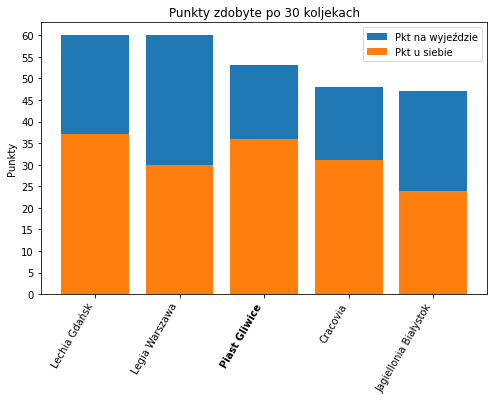

In [49]:
against_all_top5 = against_all.head(5)
teams_against_all = against_all_top5['Drużyna']
points_away_all = against_all_top5['Pkt na wyjeździe'].astype(int)
points_home_all = against_all_top5['Pkt u siebie'].astype(int)

fig, against_all_plt = plt.subplots(figsize=(8,5))

bar = against_all_plt.bar(teams_against_all, points_away_all,  bottom=points_home_all, label='Pkt na wyjeździe')
bar = against_all_plt.bar(teams_against_all, points_home_all, label='Pkt u siebie')
plt.xticks(rotation=60, ha='right')
plt.ylabel('Punkty')
plt.title('Punkty zdobyte po 30 koljekach')
plt.ylim(ymin=0)
plt.yticks((np.arange(0, 65, 5)))
against_all_plt.get_xticklabels()[2].set_weight('bold')
against_all_plt.legend()
plt.show()

Piast był drugą najlepiej punktującom drużynom w meczach domowych zdobywając 36 punktów na 46 możliwych, dużo słabej grali jednak na wyjazdach jednak to dotyczyło całej ekstraklasy w tym sezonie do najlepszej w tym aspekcie Legii, Piast stracił 13pkt. Pozostałe drużyny nie wypracowały nad Piastem dużej przewagi punktowej licząc mecze wyjazdowe, a przy dobrych wynikach u siebie pozwoliło to na zajęcie 3 miejsca w tabeli po 30 kolejkach ze stratą 6pkt do Legii oraz Lechii.

## Punkty zdobywane przeciwko drużyną z TOP 8

In [50]:
list_top_8 = list(standings.loc[:8,['Drużyna']]['Drużyna'])
against_top = results_against(results_2019, list_top_8 , list_top_8, 'TOP8 Ligi')
against_top

,Drużyna,przeciwko:,Pkt na wyjeździe,Pkt u siebie,Bramki strzelone,Bramki Stracone,Pkt
1,Lechia Gdańsk,TOP8 Ligi,11,17,21,15,28
2,Cracovia,TOP8 Ligi,7,16,17,16,23
3,Zagłębie Lubin,TOP8 Ligi,16,7,24,18,23
4,Legia Warszawa,TOP8 Ligi,9,13,16,12,22
5,Jagiellonia Białystok,TOP8 Ligi,8,11,17,19,19
6,Piast Gliwice,TOP8 Ligi,5,14,22,18,19
7,Lech Poznań,TOP8 Ligi,1,10,12,22,11
8,Pogoń Szczecin,TOP8 Ligi,3,8,16,25,11


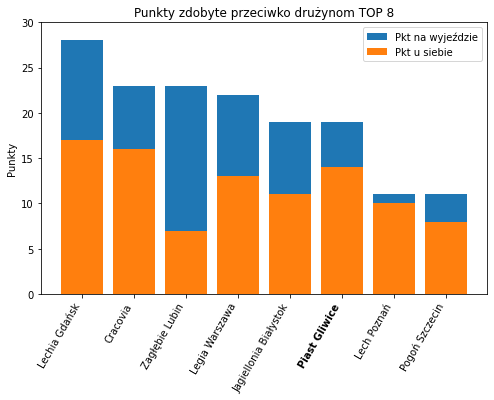

In [51]:
teams_against_top = against_top['Drużyna']
points_away_top = against_top['Pkt na wyjeździe'].astype(int)
points_home_top = against_top['Pkt u siebie'].astype(int)

fig, against_top8_plt = plt.subplots(figsize=(8,5))

bar = against_top8_plt.bar(teams_against_top, points_away_top,  bottom=points_home_top, label='Pkt na wyjeździe')
bar = against_top8_plt.bar(teams_against_top, points_home_top, label='Pkt u siebie')
plt.xticks(rotation=60, ha='right')
plt.ylabel('Punkty')
plt.title('Punkty zdobyte przeciwko drużynom TOP 8')
plt.ylim(ymin=0)
plt.yticks((np.arange(0, 35, 5)))
against_top8_plt.get_xticklabels()[5].set_weight('bold')
plt.legend()
plt.show()

Mecze między drużynami z top 8 podczas sezonu zasadniczego byłby bardzo wyrównane, żaden zespół nie wypracował tu znaczącej przewgi punktowej nad pozostałą siódemką. Poza drużyną Zagłębia Lubin można dostrzec zależność, wysokiej skuteczności w meczch u siebie i słabej dyspozycji na wyjazdach. Piast pomimo iż zajmuje w tej statystyce dopiero 6 miejsce to poza stratą 9 punktów do pierwszej pod tym względem Lechii, nie odstaje od pierwszej piątki tracąc do drugiej Cracovii zaledwie 4 pkt.

## Punkty zdobywane przeciwko drużynom z dołu tabeli

In [52]:
bottom_8 = standings.loc[9:,['Drużyna']]
list_bottom_8 = list(bottom_8.Drużyna)
against_bottom = results_against(results_2019, list_top_8,list_bottom_8, 'dolna ósemka')
against_bottom

,Drużyna,przeciwko:,Pkt na wyjeździe,Pkt u siebie,Bramki strzelone,Bramki Stracone,Pkt
1,Legia Warszawa,dolna ósemka,21,17,32,19,38
2,Piast Gliwice,dolna ósemka,12,22,25,13,34
3,Lech Poznań,dolna ósemka,14,18,29,18,32
4,Lechia Gdańsk,dolna ósemka,12,20,24,10,32
5,Pogoń Szczecin,dolna ósemka,12,20,28,17,32
6,Jagiellonia Białystok,dolna ósemka,15,13,28,22,28
7,Cracovia,dolna ósemka,10,15,22,18,25
8,Zagłębie Lubin,dolna ósemka,9,15,24,20,24


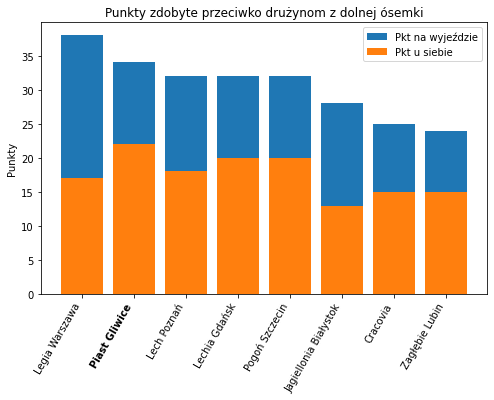

In [53]:
teams_against_bottom = against_bottom['Drużyna']
points_away_bottom = against_bottom['Pkt na wyjeździe'].astype(int)
points_home_bottom = against_bottom['Pkt u siebie'].astype(int)

fig, against_bottom_plt = plt.subplots(figsize=(8,5))

bar = against_bottom_plt.bar(teams_against_bottom, points_away_bottom,  bottom=points_home_bottom, label='Pkt na wyjeździe')
bar = against_bottom_plt.bar(teams_against_bottom, points_home_bottom, label='Pkt u siebie')
plt.xticks(rotation=60, ha='right')
plt.ylabel('Punkty')
plt.title('Punkty zdobyte przeciwko drużynom z dolnej ósemki')
plt.ylim(ymin=5)
plt.yticks((np.arange(0, 40, 5)))
against_bottom_plt.get_xticklabels()[1].set_weight('bold')
plt.legend()
plt.show()

W meczach z drużynami z dolnej ósemki Piast zdobył 2-gi najelepszy wynik punktowy. Od czołowej piątki pod tym względem odstają drużyny Jagielloni, Cracovii i Zagłębia, były one z kolei wysoko w zestawieniu punktów przeciwko drużynom top 8. Przewaga, która wypracowały w meczach z drużynami lepszymi straconę zostały w meczach ze słabszymi rywalami. Piast wygrywał mecze ze słabszymi rywalami nie tracąc punktów na drużynach nie zaangażowanych w walke o wyższe miejsce co zaskutkowało trzecim miejscem w tabeli po sezonie zasadniczym.

## Punkty w rundzie finałowej

In [54]:
final_points = results_against(results_final2019, list_top_8 , list_top_8, 'TOP8 Ligi')
final_points

,Drużyna,przeciwko:,Pkt na wyjeździe,Pkt u siebie,Bramki strzelone,Bramki Stracone,Pkt
1,Piast Gliwice,TOP8 Ligi,7,12,10,2,19
2,Jagiellonia Białystok,TOP8 Ligi,3,7,10,11,10
3,Cracovia,TOP8 Ligi,3,6,6,9,9
4,Pogoń Szczecin,TOP8 Ligi,7,2,13,12,9
5,Lech Poznań,TOP8 Ligi,2,7,8,8,9
6,Legia Warszawa,TOP8 Ligi,3,5,7,7,8
7,Lechia Gdańsk,TOP8 Ligi,3,4,9,13,7
8,Zagłębie Lubin,TOP8 Ligi,3,3,9,10,6


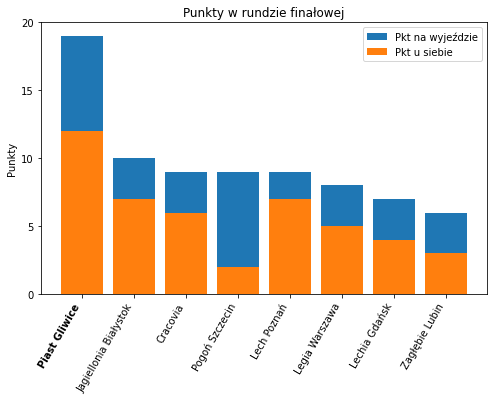

In [55]:
teams_final = final_points['Drużyna']
points_away_final = final_points['Pkt na wyjeździe'].astype(int)
points_home_final = final_points['Pkt u siebie'].astype(int)

fig, final_round_plt = plt.subplots(figsize=(8,5))

bar = final_round_plt.bar(teams_final, points_away_final,  bottom=points_home_final, label='Pkt na wyjeździe')
bar = final_round_plt.bar(teams_final, points_home_final, label='Pkt u siebie')
plt.xticks(rotation=60, ha='right')
plt.ylabel('Punkty')
plt.title('Punkty w rundzie finałowej')
plt.ylim(ymin=5)
plt.yticks((np.arange(0, 25, 5)))
final_round_plt.get_xticklabels()[0].set_weight('bold')
plt.legend()
plt.show()

Tak jak już zostało to przedstawione w zestawieniu ostatnich mistrzów, Piast zagrał świetną rundę finałową wyrównując rekord z 2014 roku pod względem zdobytych punktów.  Pomimo przeciętnej dyspozycji w sezonie zasadniczym przeciowko drużynom top 8, drużyna Piasta w rundzie finałowej straciła jedynie 2 punkty, remisując jeden mecz z Pogonią. Pozostałe drużyny podobnie jak wcześniej "dzieliły" się punktami stąd przewaga 10 punktów nad drugą pod względem punktów w rundzie finałowej nad drugą Cracovią i odpowiednio 11 i 12 (w 7 kolejkach) nad Lechią i Legią, z którymi Piast walczył o tytuł. 

# Kluczowe statystyki

## Statystyki strzeleckie

In [56]:
standings_after37 = pd.DataFrame(ekstraklasa2019[5])
standings_after37.drop(index = [0,9], inplace=True)
standings_after37.reset_index(inplace=True)
standings_after37.rename(columns={'Bramki': 'Bramki strzelone', 'Różn.' : 'Bramki stracone', 'Uwagi' : 'Pkt', 'Pkt' : 'Różn.'}, inplace=True)
standings_after37.drop(columns= ['index', 'Pkt RZ', 'index Exeption'], inplace=True)
standings_after37['Drużyna'] = standings_after37['Drużyna'].str.split('(').str[0]
standings_after37.loc[:, standings_after37.columns.isin(['Drużyna', 'Bramki strzelone', 'Bramki stracone', 'Różn.'])]

,Drużyna,Bramki strzelone,Bramki stracone,Różn.
0,Piast Gliwice,57,33,+24
1,Legia Warszawa,55,38,+17
2,Lechia Gdańsk,54,38,+16
3,Cracovia,45,43,+2
4,Jagiellonia Białystok,55,52,+3
5,Zagłębie Lubin,57,48,+9
6,Pogoń Szczecin,57,54,+3
7,Lech Poznań,49,48,+1
8,Wisła Kraków,67,63,+4
9,Korona Kielce,42,54,−12


Piast był drugi pod względem strzelonych bramek oraz, co ważniejsze według opracowanych macierzy korelacji, stracił ich najmniej, zdecydowanie przodując w lidze bilansem bramkowym.

## Strzelcy bramek

In [57]:
goals_asists = get_tables_list('https://ekstrastats.pl/klasyfikacja-kanadyjska-3/', 'tablepress')[0]
goal_scorers = pd.DataFrame.from_dict(goals_asists)
goal_scorers.columns = goal_scorers.columns.str.lower()
goal_scorers

,zawodnik,klub,gole,asysty,kanadyjska,g rez,as rez,g 1-0/0-1,g i poł,g ii poł
0,Igor Angulo,Górnik Zabrze,24,3,27,2,0,6,7,17
1,Carlitos,Legia Warszawa,16,6,22,1,1,6,4,12
2,Marcin Robak,Śląsk Wrocław,18,2,20,0,0,7,9,9
3,Filip Starzyński,Zagłębie Lubin,13,6,19,0,0,4,4,9
4,Żarko Udovicić,Zagłębie Sosnowiec,10,9,19,0,0,2,4,6
...,...,...,...,...,...,...,...,...,...,...
282,Krzysztof Kołodziej,Lech Poznań,0,1,1,0,1,0,0,0
283,Piotr Tomasik,Lech Poznań,0,1,1,0,0,0,0,0
284,Damian Dąbrowski,Cracovia,0,1,1,0,0,0,0,0
285,Patryk Szysz,Zagłębie Lubin,1,0,1,0,0,0,0,1


In [58]:
goal_scorers['gole'] = goal_scorers['gole'].astype(int)
top_scorers = goal_scorers.sort_values('gole', ascending=False).head(5)
top_scorers

,zawodnik,klub,gole,asysty,kanadyjska,g rez,as rez,g 1-0/0-1,g i poł,g ii poł
0,Igor Angulo,Górnik Zabrze,24,3,27,2,0,6,7,17
2,Marcin Robak,Śląsk Wrocław,18,2,20,0,0,7,9,9
5,Jesus Imaz,Wisła K/Jagiellonia,16,3,19,2,0,5,7,9
1,Carlitos,Legia Warszawa,16,6,22,1,1,6,4,12
9,Flavio Paixao,Lechia Gdańsk,15,1,16,0,0,7,8,7


In [59]:
piast_top_scorer = goal_scorers[goal_scorers['klub'] == 'Piast Gliwice']
piast_top_scorer = piast_top_scorer[piast_top_scorer['gole'] == max(piast_top_scorer['gole'])]
piast_top_scorer

,zawodnik,klub,gole,asysty,kanadyjska,g rez,as rez,g 1-0/0-1,g i poł,g ii poł
25,Piotr Parzyszek,Piast Gliwice,9,4,13,1,0,7,6,3


In [60]:
top_scorers_append = top_scorers.append(piast_top_scorer)
top_scorers_append['zawodnik'] = top_scorers_append['zawodnik']+', '+top_scorers_append['klub']
top_scorers_append

,zawodnik,klub,gole,asysty,kanadyjska,g rez,as rez,g 1-0/0-1,g i poł,g ii poł
0,"Igor Angulo, Górnik Zabrze",Górnik Zabrze,24,3,27,2,0,6,7,17
2,"Marcin Robak, Śląsk Wrocław",Śląsk Wrocław,18,2,20,0,0,7,9,9
5,"Jesus Imaz, Wisła K/Jagiellonia",Wisła K/Jagiellonia,16,3,19,2,0,5,7,9
1,"Carlitos, Legia Warszawa",Legia Warszawa,16,6,22,1,1,6,4,12
9,"Flavio Paixao, Lechia Gdańsk",Lechia Gdańsk,15,1,16,0,0,7,8,7
25,"Piotr Parzyszek, Piast Gliwice",Piast Gliwice,9,4,13,1,0,7,6,3


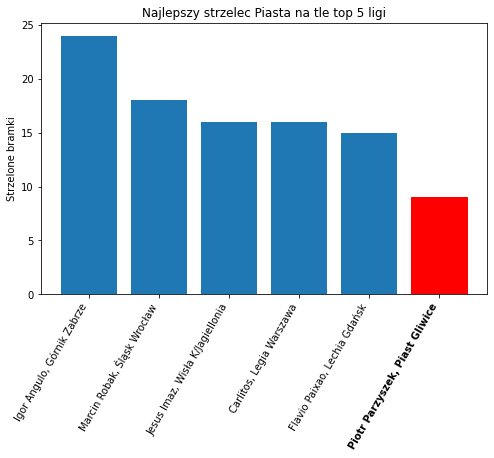

In [61]:
player_goals = top_scorers_append['zawodnik']
goals = top_scorers_append['gole']

fig, scorers_plt = plt.subplots(figsize=(8,5))

bar = scorers_plt.bar(player_goals, goals)
bar[5].set_color('r')
plt.xticks(rotation=60, ha='right')
scorers_plt.get_xticklabels()[5].set_weight('bold')
plt.ylabel('Strzelone bramki')
plt.title('Najlepszy strzelec Piasta na tle top 5 ligi')
plt.show()

In [62]:
five_goals = goal_scorers.copy()
five_goals['zawodnicy_5bramek'] = 1
five_goals = five_goals[five_goals['gole'] > 4]
five_goals = five_goals.groupby('klub').sum().sort_values('zawodnicy_5bramek', ascending=False)
five_goals = five_goals.reset_index()

top5_five_goals = five_goals.head(5)
top5_five_goals

,klub,gole,zawodnicy_5bramek
0,Arka Gdynia,35,5
1,Piast Gliwice,32,5
2,Pogoń Szczecin,43,5
3,Zagłębie Lubin,41,4
4,Wisła Płock,28,4


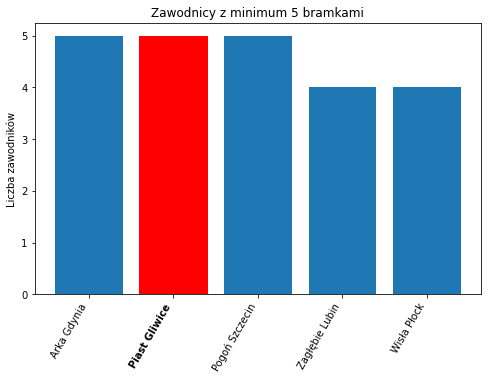

In [63]:
number_five_goals = top5_five_goals['zawodnicy_5bramek']
club_five_goals = top5_five_goals['klub']

fig, five_goals_plt = plt.subplots(figsize=(8,5))

bar = five_goals_plt.bar(club_five_goals, number_five_goals)
bar[1].set_color('r')
plt.xticks(rotation=60, ha='right')
plt.ylabel('Liczba zawodników')
plt.title('Zawodnicy z minimum 5 bramkami')
plt.ylim(ymin=0)
plt.yticks((np.arange(0, 6, 1)))
five_goals_plt.get_xticklabels()[1].set_weight('bold')
plt.show()

Piast nie posiadał w swojej drużynie najlepszego snajpera z ligi, najwięcej bramek w drużynie strzeli Piotr Parzyszek, jednak jego 9 bramek to wynik bardzo przeciętny co widać na tle z najlepszymi strzelacami ligi. Gole Piasta rozkładały się bardziej równo miernie między zawodników, to Piast posiadał najwięcej piłkarzy ze strzelonymi co najmniej 5 bramkami w sezonie, co pozwoliło mimo przeciętych wyników indywidualnych być drugą najlepiej strzelającą drużynom w lidze

## Asysty

In [64]:
asists = pd.DataFrame.from_dict(goals_asists)
asists.columns = asists.columns.str.lower()
asists = asists.sort_values('asysty', ascending=False)
asists['zawodnik'] = asists['zawodnik'] + ', ' + asists['klub']
asists['asysty'] = asists['asysty'].astype(int)
asists_top5 = asists.head(5)
asists_top5

,zawodnik,klub,gole,asysty,kanadyjska,g rez,as rez,g 1-0/0-1,g i poł,g ii poł
4,"Żarko Udovicić, Zagłębie Sosnowiec",Zagłębie Sosnowiec,10,9,19,0,0,2,4,6
31,"Filip Mladenović, Lechia Gdańsk",Lechia Gdańsk,3,9,12,0,0,2,2,1
17,"Jesus Jimenez, Górnik Zabrze",Górnik Zabrze,5,9,14,0,0,2,4,1
50,"Martin Konczkowski, Piast Gliwice",Piast Gliwice,0,8,8,0,1,0,0,0
8,"Zvonimir Kozulj, Pogoń Szczecin",Pogoń Szczecin,9,8,17,0,0,1,3,6


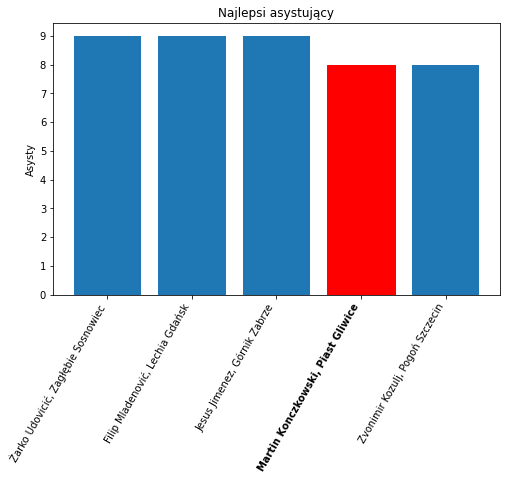

In [65]:
number_asists = asists_top5['asysty']
player_asists = asists_top5['zawodnik']

fig, asists_top5_plt = plt.subplots(figsize=(8,5))

bar = asists_top5_plt.bar(player_asists, number_asists)
bar[3].set_color('r')
plt.xticks(rotation=60, ha='right')
plt.ylim(ymin=0)
plt.yticks((np.arange(0, 10, 1)))
asists_top5_plt.get_xticklabels()[3].set_weight('bold')
plt.ylabel('Asysty')
plt.title('Najlepsi asystujący')
plt.show()

In [66]:
asists_min_one = asists.copy()
asists_min_one['min1_asysta'] = 1
asists_min_one = asists_min_one[asists_min_one['asysty']>1]
asists_min_one = asists_min_one.groupby('klub').sum()
asists_min_one = asists_min_one.reset_index()
asists_min_one = asists_min_one.sort_values('min1_asysta', ascending=False)
asists_min_top = asists_min_one.head(5)
asists_min_top

,klub,asysty,min1_asysta
7,Legia Warszawa,37,10
10,Piast Gliwice,39,10
14,Wisła Kraków,30,9
9,Miedź Legnica,22,8
15,Wisła Płock,27,8


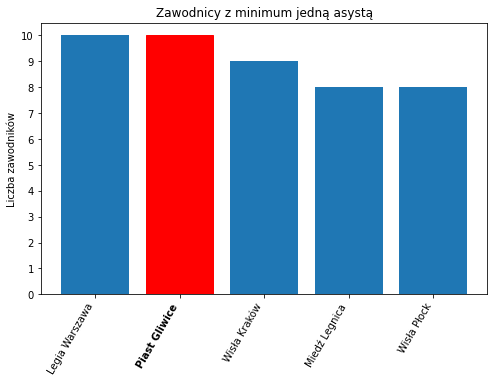

In [67]:
asists_min_club = asists_min_top['klub']
asists_min_number = asists_min_top['min1_asysta'].astype(int)

fig, one_asist_plt = plt.subplots(figsize=(8,5))

bar = one_asist_plt.bar(asists_min_club, asists_min_number)
bar[1].set_color('r')
plt.xticks(rotation=60, ha='right')
plt.ylabel('Liczba zawodników')
plt.title('Zawodnicy z minimum jedną asystą')
plt.ylim(ymin=0)
plt.yticks((np.arange(0, 11, 1)))
one_asist_plt.get_xticklabels()[1].set_weight('bold')
plt.show()

Podobnie jak w przypadku strzelonych bramek, Piast lideruje pod względem liczby zawodników którzy sie do tego przyczynili, w tym przypadku jednak również wwysoko w zestawieniu najlepszych asystujących znajduje się Martin Konczkowski. Obydwie te statystyki (bramki i asysty) mogą świadczyć o zespołowej grze Piasta w której w kreowanie sytuacji zangażowanych jest jak najwięcej zawodników, co jak widać przyniosło zamierzone efekty

## Statystyki bramkarzy

In [115]:
goalkeepers_stats = pd.DataFrame(get_tables_list(clean_sheets_url2019, 'tablepress')[0])
goalkeepers_stats.replace({',':'.','%':''}, regex=True,inplace=True)
goalkeepers_stats.iloc[:,3:] = goalkeepers_stats.iloc[:,3:].astype(float)
goalkeepers_stats.head(5)


,Lp.,BRAMKARZ,KLUB,MECZE,CZYSTE KONTA,MIN - AKTUALNIE,MIN - SEZON,MIN - REKORD,% OBR,OBR,STRZ,PG,% CK
0,1.,Dusan Kuciak,Lechia Gdańsk,28,16,136,432,799,75.2,85,113,28,44
1,2.,Frantisek Plach,Piast Gliwice,25,12,148,334,334,80,84,105,21,48
2,3.,Michal Pesković,Cracovia,26,10,16,348,469,73.5,72,98,26,25
3,4.,Jakub Słowik,Śląsk Wrocław,35,10,243,366,366,71.6,101,141,42,25
4,5.,Pavels Steinbors,Arka Gdynia,37,9,19,263,327,69.3,113,163,51,25


## Czyste konta

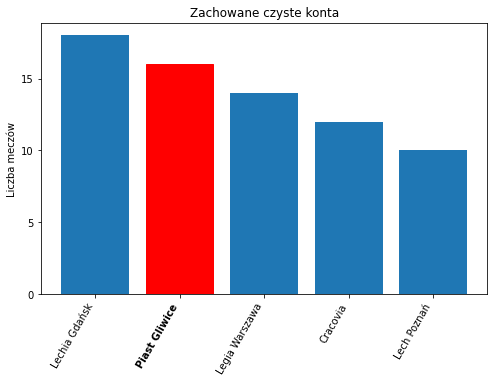

In [69]:
clean_sheets = goalkeepers_stats.groupby('KLUB').sum()
clean_sheets_top =clean_sheets.sort_values('CZYSTE KONTA', ascending=False).head(5)

fig, clean_sheets_plt = plt.subplots(figsize=(8,5))

bar = clean_sheets_plt.bar(clean_sheets_top.index, clean_sheets_top['CZYSTE KONTA'])
bar[1].set_color('r')
plt.xticks(rotation=60, ha='right')
plt.ylabel('Liczba meczów')
plt.title('Zachowane czyste konta')
plt.ylim(ymin=0)
plt.yticks((np.arange(0, 20, 5)))
clean_sheets_plt.get_xticklabels()[1].set_weight('bold')
plt.show()


## Procent obronionych strzałów (min.30 oddnaych strzałów na bramkę)

In [70]:
saves_procentage = goalkeepers_stats.loc[goalkeepers_stats['STRZ'] > 30.0, goalkeepers_stats.columns.isin(['BRAMKARZ', 'KLUB', '% OBR'])].sort_values('% OBR', ascending =False)
saves_procentage['BRAMKARZ'] = saves_procentage['BRAMKARZ'] + ', ' + saves_procentage['KLUB']
saves_procentage.head(5)

,BRAMKARZ,KLUB,% OBR
9,"Radosław Cierzniak, Legia Warszawa",Legia Warszawa,80
1,"Frantisek Plach, Piast Gliwice",Piast Gliwice,80
15,"Jakub Szmatuła, Piast Gliwice",Piast Gliwice,75.6
0,"Dusan Kuciak, Lechia Gdańsk",Lechia Gdańsk,75.2
6,"Martin Chudy, Górnik Zabrze",Górnik Zabrze,74.6


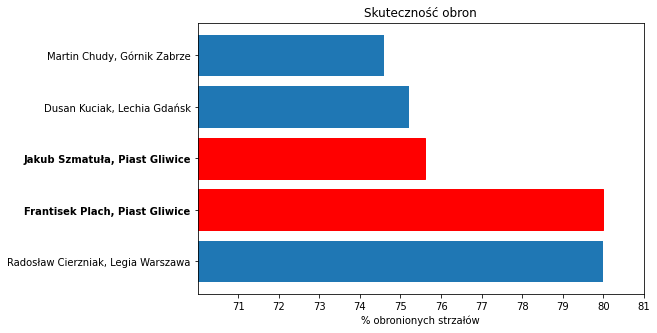

In [71]:
fig,saves_procentage_plt = plt.subplots(figsize=(8,5))

barh = saves_procentage_plt.barh(saves_procentage.head(5)['BRAMKARZ'], saves_procentage.head(5)['% OBR'])
barh[1].set_color('r')
barh[2].set_color('r')
plt.xlabel('% obronionych strzałów')
plt.title('Skuteczność obron')
plt.xlim(xmin=70.0, xmax=80)
plt.xticks((np.arange(71.0, 82.0, 1.0)))
saves_procentage_plt.get_yticklabels()[1].set_weight('bold')
saves_procentage_plt.get_yticklabels()[2].set_weight('bold')
plt.show()



# Żółte kartki

In [72]:
cards = pd.DataFrame(get_tables_list(cards_url2019, 'tablepress')[0])
cards

,KLUB,ŻK/mecz,ŻK,CZK BEZP,CZK,żk faul,czk faul,żk ręka,żk rywal,żk sędzia,żk czas,żk syml,żk ciesz,żk inne,czk ręka,czk rywal,czk inne,czk sędzia
0,Arka Gdynia,"2,08",77,0,4,67,0,2,2,2,2,2,0,0,0,0,0,0
1,Cracovia,"2,08",77,1,1,58,1,1,9,5,2,2,0,0,0,0,0,0
2,Górnik Zabrze,"2,24",83,0,4,68,0,4,5,1,1,3,1,0,0,0,0,0
3,Jagiellonia,"2,11",78,3,3,64,2,4,3,5,0,1,0,1,1,0,0,0
4,Korona Kielce,"2,57",95,1,2,75,1,1,3,8,8,0,0,0,0,0,0,0
5,Lech Poznań,"1,76",65,0,0,56,0,0,1,4,3,1,0,0,0,0,0,0
6,Lechia Gdańsk,"2,51",93,1,3,70,1,3,3,10,7,0,0,0,0,0,0,0
7,Legia Warszawa,"2,11",78,3,4,60,1,2,9,4,2,1,0,0,0,2,0,0
8,Miedź Legnica,"1,68",62,4,4,53,3,3,3,2,1,0,0,0,0,1,0,0
9,Piast Gliwice,"1,43",53,2,2,43,2,0,5,3,2,0,0,0,0,0,0,0


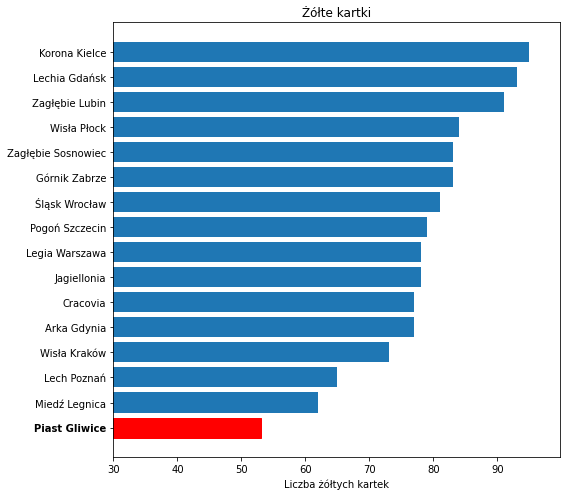

In [76]:
cards.sort_values('ŻK', inplace=True)

fig, cards_plt = plt.subplots(figsize=(8,8))

bar = cards_plt.barh(cards['KLUB'], cards['ŻK'].astype(int))
bar[0].set_color('r')
plt.xlabel('Liczba żółtych kartek')
plt.title('Żółte kartki')
plt.xlim(xmin=40)
plt.xticks((np.arange(30, 100, 10)))
cards_plt.get_yticklabels()[0].set_weight('bold')
plt.show()

## Czas pracy trenera

In [85]:
trainers = FunctionsCorrelation.get_trainers_table(wikipedia_urls)
trainers_df = FunctionsCorrelation.get_trainers_df(trainers, 1)
trainers_df


,klub,prezes,trener,dni pracy trenera
0,Arka Gdynia,Wojciech Pertkiewicz,Jacek Zieliński,79
1,Cracovia,Janusz Filipiak,Michał Probierz,740
2,Górnik Zabrze,Bartosz Sarnowski,Marcin Brosz,1122
3,Jagiellonia Białystok,Cezary Kulesza,Ireneusz Mamrot,748
4,Korona Kielce,Krzysztof Zając,Gino Lettieri,762
5,Lech Poznań,Karol Klimczak,Dariusz Żuraw,91
6,Lechia Gdańsk,Adam Mandziara,Piotr Stokowiec,482
7,Legia Warszawa,Dariusz Mioduski,/ Aleksandar Vuković,89
8,Miedź Legnica,Andrzej Dadełło,Dominik Nowak,751
9,Piast Gliwice,Paweł Żelem,Waldemar Fornalik,649


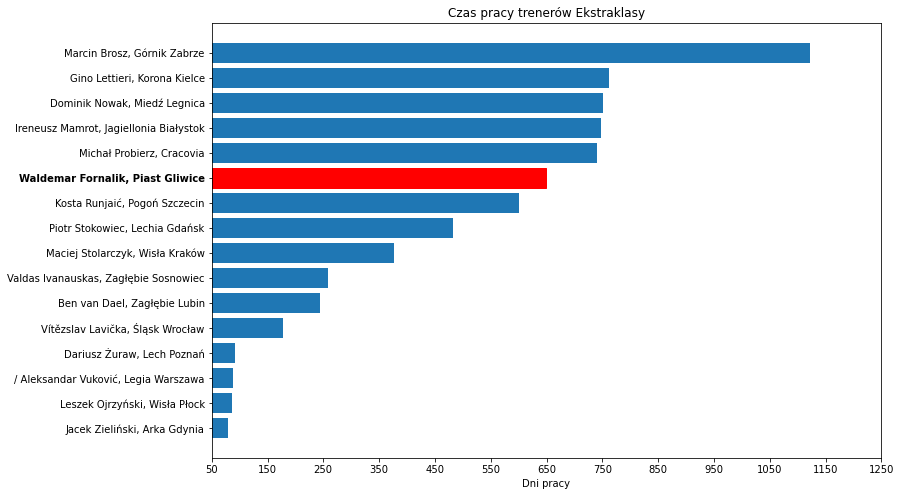

In [91]:
trainers_work = trainers_df.copy()
trainers_work.sort_values('dni pracy trenera', inplace=True)
trainers_work['trener'] = trainers_work['trener'] + ', ' + trainers_work['klub']

fig, trainers_plt = plt.subplots(figsize=(12,8))

bar = trainers_plt.barh(trainers_df['trener'], trainers_df['dni pracy trenera'])
bar[10].set_color('r')
plt.xlabel('Dni pracy')
plt.title('Czas pracy trenerów Ekstraklasy')
plt.xlim(xmin=100)
plt.xticks((np.arange(50, 1300, 100)))
trainers_plt.get_yticklabels()[10].set_weight('bold')
plt.show()


# Wycena składu

In [95]:
team_value_table = FunctionsCorrelation.get_tm_table(tm_urls)
team_value = FunctionsCorrelation.get_tm_df(team_value_table, 1)
team_value

,lp,klub,kadra,ø-wiek,obcokrajowcy,łączna wartość rynkowa,ø-wartość rynkowa,całkowita wr,ø-wr
0,,Legia Warszawa,44,"25,0",20,"34,73 mln €",789 tys. €,"34,73 mln €",789 tys. €
1,,Lech Poznań,41,"23,6",15,"18,80 mln €",459 tys. €,"18,80 mln €",459 tys. €
2,,Jagiellonia Białystok,45,"23,8",18,"15,43 mln €",343 tys. €,"15,43 mln €",343 tys. €
3,,Cracovia,50,"23,1",21,"12,48 mln €",250 tys. €,"12,48 mln €",250 tys. €
4,,Lechia Gdańsk,36,"23,1",9,"11,28 mln €",313 tys. €,"11,28 mln €",313 tys. €
5,,Wisła Kraków,45,"23,1",11,"11,01 mln €",245 tys. €,"11,01 mln €",245 tys. €
6,,Pogoń Szczecin,44,"22,6",10,"10,68 mln €",243 tys. €,"10,68 mln €",243 tys. €
7,,Miedź Legnica,37,"25,8",17,"10,20 mln €",276 tys. €,"10,20 mln €",276 tys. €
8,,Górnik Zabrze,39,"22,1",9,"9,73 mln €",249 tys. €,"9,73 mln €",249 tys. €
9,,Wisła Płock,36,"23,9",11,"9,45 mln €",263 tys. €,"9,45 mln €",263 tys. €


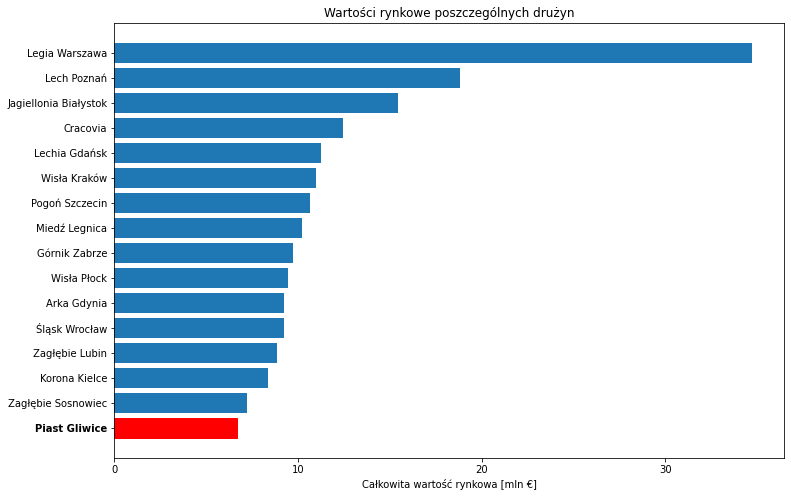

In [114]:
team_value1= team_value.copy()
team_value1['całkowita wr'].replace({' ': '', ',':'.', 'mln':'', '€':''},regex =True, inplace=True)
team_value1['całkowita wr'] = team_value1['całkowita wr'].astype(float)
team_value1.sort_values('całkowita wr', inplace=True)
fig, trainers_plt = plt.subplots(figsize=(12,8))

bar = trainers_plt.barh(team_value1['klub'], team_value1['całkowita wr'])
bar[0].set_color('r')
plt.xlabel('Całkowita wartość rynkowa [mln €]')
plt.title('Wartości rynkowe poszczególnych drużyn')
plt.xlim(xmin=0.0)
plt.xticks((np.arange(0.0, 40.0, 10.0)))
trainers_plt.get_yticklabels()[0].set_weight('bold')
plt.show()